## 1. import

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

import copy

## 2. functions

In [3]:
# Read from csv file
def get_df(path):
    df = pd.read_csv(path)
    df['date']=pd.to_datetime(df['date'], errors='coerce')  #error-->nat
    df = df.drop(df[df['date'].isnull()].index)  # remove NAT rows
    df['year'] = df['date'].dt.year
    df['year_month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))
    df.sort_values(by="date", inplace=True, ascending=True) # Sort by the dates
    return df

# Emotional analysis
# negative neutral positive compound
def emotion_analysis(text_list):
    sid = SentimentIntensityAnalyzer()
    result = []
    temp = 0
    for sen in text_list:
        senti = sid.polarity_scores(sen)   # text
        result.append(senti)
    return result

## call emotion_analysis(text)
def get_title_text_emo(path):
    df = get_df(path)
    texts_emo = emotion_analysis(df['text'])
    df['text_emo'] = [e['compound'] for e in texts_emo]
    titles_emo = emotion_analysis(df['title'])
    df['title_emo'] = [e['compound'] for e in titles_emo]
    ## label text
    df['text_label'] = 'neu'
    df.loc[df['text_emo']>0.33, 'text_label'] = 'pos'
    df.loc[df['text_emo']<-0.33, 'text_label'] = 'neg'
    ## label title
    df['title_label'] = 'neu'
    df.loc[df['title_emo']>0.33, 'title_label'] = 'pos'
    df.loc[df['title_emo']<-0.33, 'title_label'] = 'neg'
    return df

def get_conact_df(df):
    df_title = df[['title', 'date', 'year', 'year_month', 'title_emo']]
    df_title['type'] = 'title'
    df_title.rename(columns={'title':'content','title_emo':'emotion'}, inplace=True)
    df_text = df[['text', 'date', 'year', 'year_month', 'text_emo']]
    df_text['type'] = 'text'
    df_text.rename(columns={'text':'content','text_emo':'emotion'}, inplace=True)
    return pd.concat([df_title,df_text],axis=0)
    

## 3. dataset path

In [8]:
path_true ="kaggle/True.csv"
path_fake = "kaggle/Fake.csv"

In [9]:
%%time
# 1 min 13s
df_true = get_title_text_emo(path_true)
df_true.head()

CPU times: user 1min 2s, sys: 247 ms, total: 1min 2s
Wall time: 1min 2s


,title,text,subject,date,year,year_month,text_emo,title_emo,text_label,title_label
11257,Obama says must change the way nation manages ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-01-13,2016,2016-01,0.3744,0.0000,pos,neu
11266,Obama says too many Americans feel 'the system...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-01-13,2016,2016-01,0.5719,0.0000,pos,neu
11265,Biden: Sanders has 'struck a chord with voters...,WASHINGTON (Reuters) - U.S. Vice President Joe...,politicsNews,2016-01-13,2016,2016-01,-0.9038,-0.2500,neg,neu
11264,South Korea president says acquiring nukes wou...,SEOUL (Reuters) - If South Korea develops nucl...,politicsNews,2016-01-13,2016,2016-01,-0.1280,0.3182,neu,neu
11263,South Korea president says China response to N...,SEOUL (Reuters) - China should play a key and ...,politicsNews,2016-01-13,2016,2016-01,0.3612,0.0000,pos,neu


In [10]:
%%time
# 2 min 
df_fake = get_title_text_emo(path_fake)
df_fake.head()

CPU times: user 1min 20s, sys: 227 ms, total: 1min 20s
Wall time: 1min 21s


,title,text,subject,date,year,year_month,text_emo,title_emo,text_label,title_label
21919,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,2015,2015-03,0.9732,0.0000,pos,neu
15886,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,2015,2015-03,-0.9032,0.4527,neg,pos
15887,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,2015,2015-03,0.8122,0.2263,pos,neu
15888,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,2015,2015-03,0.9913,-0.3595,pos,neg
15889,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,2015,2015-03,0.2869,0.0000,neu,neu


## 4. sactter plot

In [11]:
sns_true = get_conact_df(df_true)
sns_true['authenticity']='True News'   # True news or Fake news

sns_fake = get_conact_df(df_fake)
sns_fake['authenticity']='Fake News'   # True news or Fake news

/var/folders/r1/rx1qw3j54d36hntsvy0pwzlm0000gn/T/ipykernel_99559/3872219246.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['type'] = 'title'
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/r1/rx1qw3j54d36hntsvy0pwzlm0000gn/T/ipykernel_99559/3872219246.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

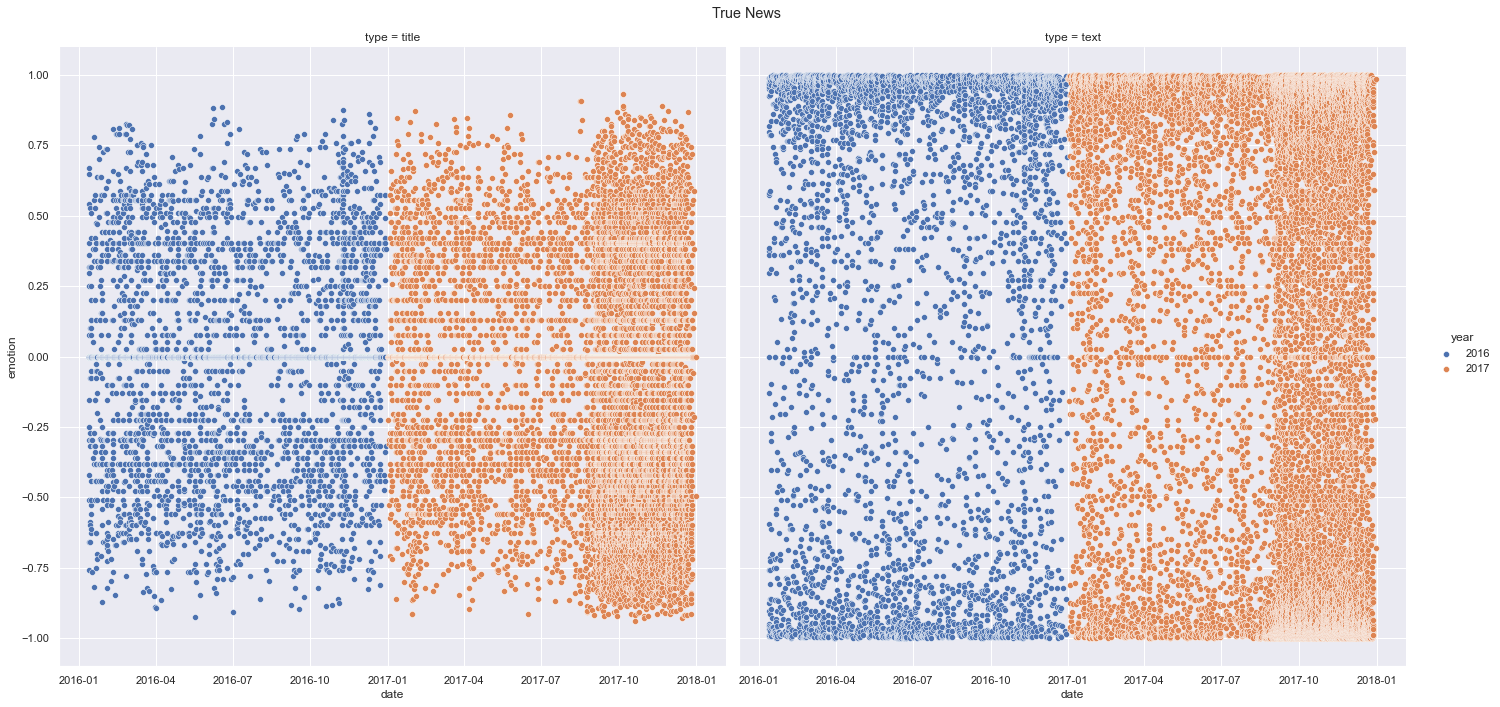

In [103]:
g_true = sns.FacetGrid(sns_true,col='type',hue='year',height=10, aspect=1)
g_true.map_dataframe(sns.scatterplot, x="date", y="emotion")
g_true.add_legend()
g_true.fig.suptitle('True News')
g_true.tight_layout()

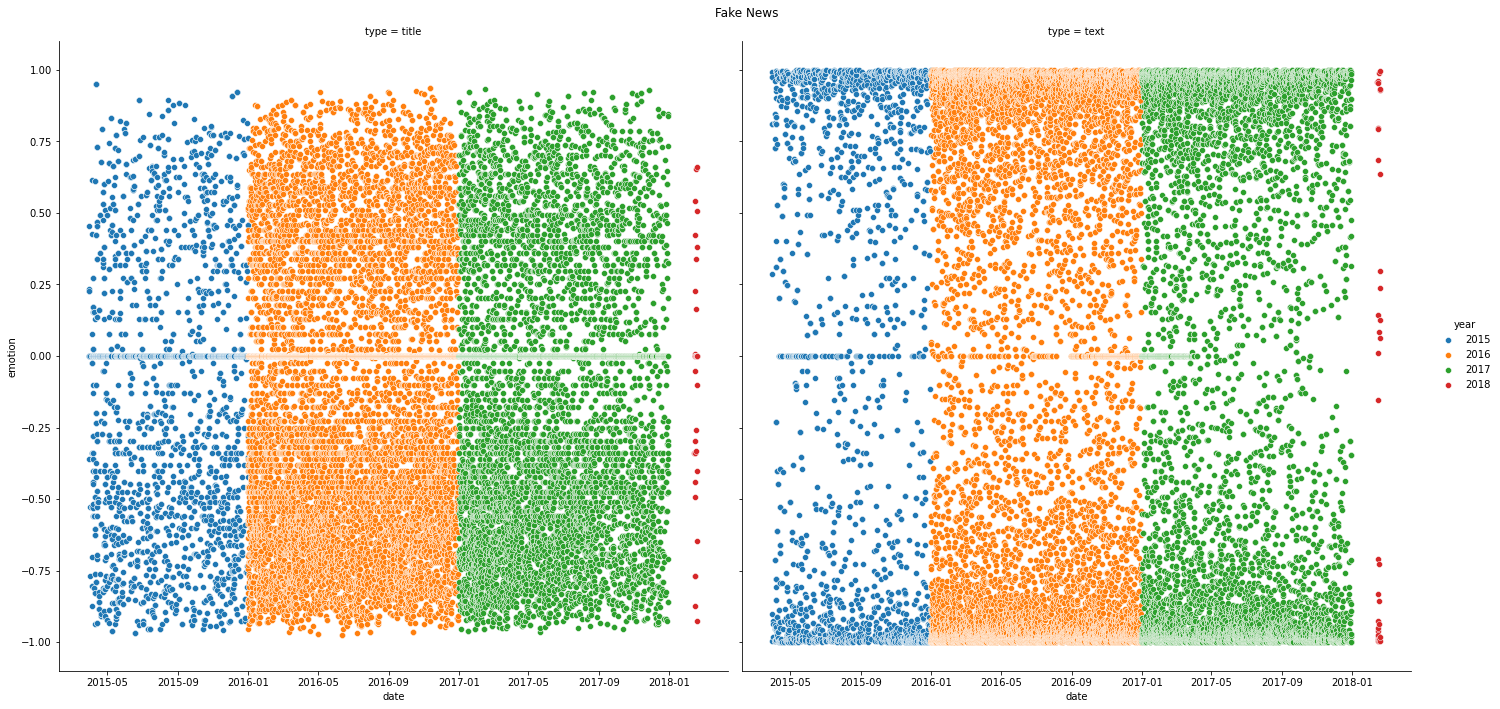

In [12]:
g_fake = sns.FacetGrid(sns_fake,col='type',hue='year',height=10, aspect=1)
g_fake.map_dataframe(sns.scatterplot, x="date", y="emotion")
g_fake.add_legend()
g_fake.fig.suptitle('Fake News')
g_fake.tight_layout()

In [13]:
# # merge version
# sns_df = pd.concat([sns_true,sns_fake],axis=0)
# g_all = sns.FacetGrid(sns_df,col='type',row='authenticity',hue='year',height=10, aspect=1)
# g_all.map_dataframe(sns.scatterplot, x="date", y="emotion")
# g_all.add_legend()
# g_all.fig.suptitle('True News and Fake News')
# g_all.tight_layout()

## 5. named entity recognition

In [14]:
import nltk
import random

In [15]:
def parse_document(document):
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    # tag sentences and use nltk's Named Entity Chunker
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    ne_chunked_sents = [nltk.ne_chunk(tagged) for tagged in tagged_sentences]
    # extract all named entities
    named_entities = []
    for ne_tagged_sentence in ne_chunked_sents:
        for tagged_tree in ne_tagged_sentence:
            # extract only chunks having NE labels
            if hasattr(tagged_tree, 'label'):
                entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #get NE name
                entity_type = tagged_tree.label() # get NE category
                named_entities.append((entity_name, entity_type))
                named_entities = list(set(named_entities))
    return named_entities

In [16]:
doc_true = list(df_true['text'])
doc_fake = list(df_fake['text'])

In [17]:
print(len(doc_true),len(doc_fake))

21417 23471


In [18]:
## Take 2,000 pieces of data randomly as a sample.
sample_num = 2000
sample_true = random.sample(doc_true, sample_num)
sample_fake = random.sample(doc_fake, sample_num)
print(len(sample_true),len(sample_fake))

2000 2000


In [22]:
%%time
# It takes a little time.  2000--> 5min 23s
ner_true = []
for sample in sample_true:
    ner = parse_document(sample)
    ner_true += ner

CPU times: user 2min 27s, sys: 554 ms, total: 2min 27s
Wall time: 2min 27s


In [23]:
frame_true = pd.DataFrame(ner_true, columns=['Entity Name', 'Entity Type'])
frame_true

,Entity Name,Entity Type
0,Obamacare,GPE
1,Trump,ORGANIZATION
2,Tom Price,PERSON
3,Senate,ORGANIZATION
4,Senate Committee,ORGANIZATION
...,...,...
48094,North Korea,GPE
48095,U.S.,GPE
48096,Democrats,ORGANIZATION
48097,Reuters,ORGANIZATION


In [24]:
group_true = frame_true.groupby(by="Entity Type").size()
group_true

Entity Type
FACILITY          745
GPE             16397
GSP               480
LOCATION          419
ORGANIZATION    14237
PERSON          15821
dtype: int64

<AxesSubplot:title={'center':'The number of entity classifications'}, xlabel='Entity Type', ylabel='Number'>

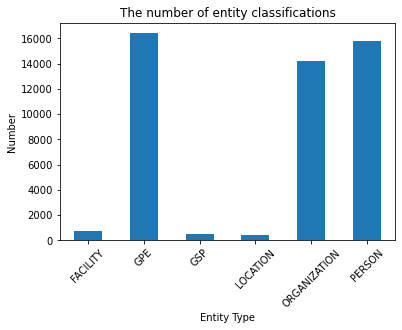

In [25]:
group_true.plot(y='size', kind="bar",title='The number of entity classifications', rot=45, ylabel='Number')  # figsize

In [26]:
# ORG  Top n=10,...
top_n = 10
frame_true_ORG = frame_true[frame_true['Entity Type']=='ORGANIZATION']
group_true_entity = frame_true_ORG.groupby(by=["Entity Name"], as_index=False).size()
group_true_entity.sort_values(by="size", inplace=True, ascending=False) # Sort by the size
group_true_entity[:top_n]

,Entity Name,size
3085,Reuters,1989
3040,Republican,512
3268,Senate,322
789,Congress,322
973,Democratic,316
1675,House,297
3619,Trump,228
3017,Representatives,164
3646,U.N.,158
3726,United Nations,155


In [27]:
%%time
# It takes a little time.  2000--> 5min 47s
ner_fake = []
for sample in sample_fake:
    ner = parse_document(sample)
    ner_fake += ner

CPU times: user 2min 40s, sys: 1.08 s, total: 2min 41s
Wall time: 2min 41s


In [28]:
frame_fake = pd.DataFrame(ner_fake, columns=['Entity Name', 'Entity Type'])
frame_fake

,Entity Name,Entity Type
0,Hillary Clinton,PERSON
1,Super,PERSON
2,Saul Alinsky,PERSON
3,Rules,PERSON
4,GOP,ORGANIZATION
...,...,...
41529,Trey,PERSON
41530,Gowdy,ORGANIZATION
41531,SenWarren,ORGANIZATION
41532,William Bairamian,PERSON


In [29]:
group_fake = frame_fake.groupby(by="Entity Type").size()
group_fake

Entity Type
FACILITY          680
GPE             10109
GSP               289
LOCATION          193
ORGANIZATION    13220
PERSON          17043
dtype: int64

In [43]:
group_fake

Entity Type
FACILITY          680
GPE             10109
GSP               289
LOCATION          193
ORGANIZATION    13220
PERSON          17043
dtype: int64

In [44]:
group_true

Entity Type
FACILITY          745
GPE             16397
GSP               480
LOCATION          419
ORGANIZATION    14237
PERSON          15821
dtype: int64

<AxesSubplot:title={'center':'The number of entity classifications'}, xlabel='Entity Type', ylabel='Number'>

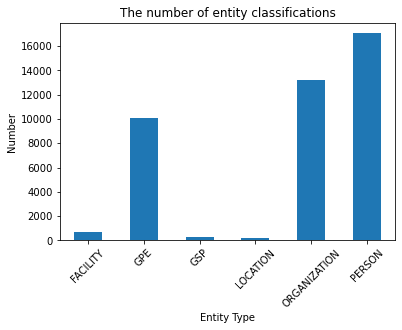

In [30]:
group_fake.plot(y='size', kind="bar",title='The number of entity classifications', rot=45, ylabel='Number')  # figsize

In [31]:
# ORG  Top n=10,...
top_n = 10
frame_fake_ORG = frame_fake[frame_fake['Entity Type']=='ORGANIZATION']
group_fake_entity = frame_fake_ORG.groupby(by=["Entity Name"], as_index=False).size()
group_fake_entity.sort_values(by="size", inplace=True, ascending=False) # Sort by the size
group_fake_entity[:top_n]

,Entity Name,size
4075,Republican,374
4809,Trump,276
1917,GOP,196
1367,Democratic,182
1644,FBI,162
1067,Congress,158
703,CNN,156
1392,Democrats,151
2252,House,142
4381,Senate,133


In [32]:
df1 = group_true_entity[:top_n].rename(columns={'Entity Name': 'Entity Name(True News)', 'size': 'size(True News)'}).reset_index(drop=True)
df2 = group_fake_entity[:top_n].rename(columns={'Entity Name': 'Entity Name(Fake News)', 'size': 'size(Fake News)'}).reset_index(drop=True)
ner_df = pd.concat([df1, df2], axis=1)
# ner_df.to_csv('./compare.csv', index=False)
ner_df

,Entity Name(True News),size(True News),Entity Name(Fake News),size(Fake News)
0,Reuters,1989,Republican,374
1,Republican,512,Trump,276
2,Senate,322,GOP,196
3,Congress,322,Democratic,182
4,Democratic,316,FBI,162
5,House,297,Congress,158
6,Trump,228,CNN,156
7,Representatives,164,Democrats,151
8,U.N.,158,House,142
9,United Nations,155,Senate,133


## 6. compare

In [33]:
df_true.head()

,title,text,subject,date,year,year_month,text_emo,title_emo,text_label,title_label
11257,Obama says must change the way nation manages ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-01-13,2016,2016-01,0.3744,0.0000,pos,neu
11266,Obama says too many Americans feel 'the system...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-01-13,2016,2016-01,0.5719,0.0000,pos,neu
11265,Biden: Sanders has 'struck a chord with voters...,WASHINGTON (Reuters) - U.S. Vice President Joe...,politicsNews,2016-01-13,2016,2016-01,-0.9038,-0.2500,neg,neu
11264,South Korea president says acquiring nukes wou...,SEOUL (Reuters) - If South Korea develops nucl...,politicsNews,2016-01-13,2016,2016-01,-0.1280,0.3182,neu,neu
11263,South Korea president says China response to N...,SEOUL (Reuters) - China should play a key and ...,politicsNews,2016-01-13,2016,2016-01,0.3612,0.0000,pos,neu


In [34]:
df_fake.head()

,title,text,subject,date,year,year_month,text_emo,title_emo,text_label,title_label
21919,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,2015,2015-03,0.9732,0.0000,pos,neu
15886,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,2015,2015-03,-0.9032,0.4527,neg,pos
15887,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,2015,2015-03,0.8122,0.2263,pos,neu
15888,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,2015,2015-03,0.9913,-0.3595,pos,neg
15889,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,2015,2015-03,0.2869,0.0000,neu,neu


In [35]:
print(set(df_true['subject']), set(df_fake['subject']))

{'politicsNews', 'worldnews'} {'US_News', 'News', 'Middle-east', 'politics', 'left-news', 'Government News'}


<AxesSubplot:title={'center':'The number of subject classifications for true news'}, xlabel='subject', ylabel='Number'>

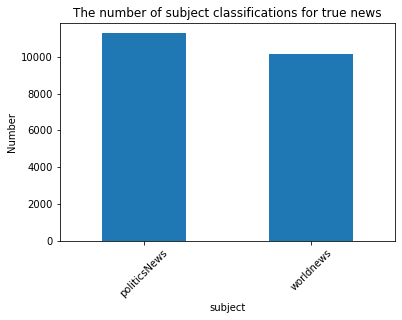

In [37]:
group_df_true = df_true.groupby(by="subject").size()
group_df_true.plot(y='size', kind="bar",title='The number of subject classifications for true news', rot=45, ylabel='Number')  # figsize

<AxesSubplot:title={'center':'The number of subject classifications for false news'}, xlabel='subject', ylabel='Number'>

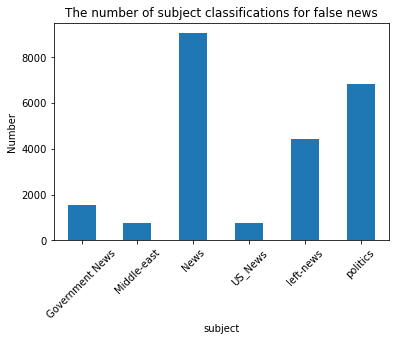

In [38]:
group_df_fake = df_fake.groupby(by="subject").size()
group_df_fake.plot(y='size', kind="bar",title='The number of subject classifications for false news', rot=45, ylabel='Number')  # figsize

## 7. draw word colud

In [39]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
from nltk import word_tokenize 

def draw_word_cloud(book_txt):
    my_stop = stopwords.words('english')
    my_stop += [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    wd = word_tokenize(book_txt)
    word_list = [word for word in wd if word not in my_stop]
    text = ' '.join(word_list)
    wc = WordCloud(stopwords=my_stop, background_color='white').generate(text)
    # show the picture
    plt.figure(figsize=(10,6.18))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [12]:
# true_news='\n'.join(df_true['text'])
# fake_news='\n'.join(df_fake['text'])

In [ ]:
## Take 2,000 pieces of data randomly as a sample.
# sample_num = 2000
# sample_true = random.sample(doc_true, sample_num)
# sample_fake = random.sample(doc_fake, sample_num)
# print(len(sample_true),len(sample_fake))

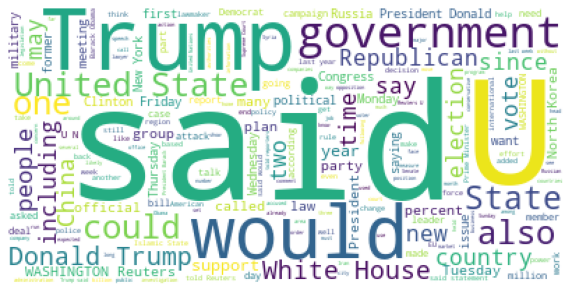

CPU times: user 7.8 s, sys: 277 ms, total: 8.07 s
Wall time: 8.04 s


In [40]:
%%time
# 1min 56s
draw_word_cloud('\n'.join(sample_true))

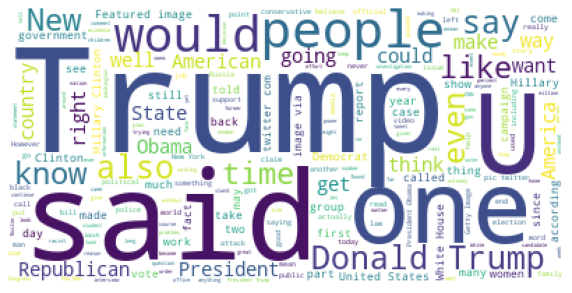

CPU times: user 7.45 s, sys: 237 ms, total: 7.68 s
Wall time: 7.62 s


In [42]:
%%time
# 58s
draw_word_cloud('\n'.join(sample_fake))